In [1]:
import json
import matplotlib.pyplot as plt

In [2]:
ds = json.loads(open('./EVAL_FINAL_01282024_b1-4_topical_test_freq.json', 'r').read())
ds2 = json.loads(open('./EVAL_FINAL_01272024_b1-4_topical_valid_freq.json', 'r').read())
ds_tiage = json.loads(open('./EVAL_FINAL_01282024_b1-4_tiage.json', 'r').read())
ds_multiwoz = json.loads(open('./EVAL_FINAL_01282024_b1-4_multiwoz.json').read())

accumulative turn scores

# initial testing

In [3]:
print(ds.keys())
with open('./eval_final2_01012024_complete_hist.json', 'w') as fp:
    json.dump(ds, fp)

dict_keys(['t_d004c097-424d-45d4-8f91-833d85c2da31', 't_04eea955-7ad7-4c3c-aa0b-0fc16e89ae1d', 't_f6789857-c30c-423a-bdf5-d6207dc7db9d', 't_c0f787a2-1a4a-47c3-95aa-50b5567504e8', 't_5653dfe8-69f5-4285-a32c-cb1bd01f40b4', 't_c41223cb-1b3d-4a2e-9a3f-1ad884b4a073', 't_551f37f7-aea2-402b-a97e-1d1000e0d7af', 't_3394e60b-87f0-489b-a2ae-861785b9017d', 't_51d376af-dd7d-4388-a2f8-c838f92e6145', 't_f11b25b0-d512-4784-a33b-bb3a34d6b63f', 't_45f6f254-c795-4a81-adc5-a5c8fdd83599', 't_f5297c3e-d4fc-425e-a3f9-f3a231464d1d', 't_369cf3a0-bb67-4304-8a69-ce81a72d4667', 't_58b5262d-22ab-4dc8-a0ff-96316174b53d', 't_cfd71db7-9e8c-423c-aa79-c71873591b2f', 't_93dc1804-5f5e-42d8-8fe2-c9acb3970219', 't_bf7ce8ac-8681-47a1-9421-114df4038e7d', 't_f0e894ec-d2ca-4f3c-94cf-750389cb7a48', 't_ef78fec3-5245-49cd-a97f-d3553d1c0205', 't_cd147f3e-6c00-4497-95fe-a180f7ddd8ac', 't_9ef31f1d-1f5c-4d2c-ac58-714eaf03153e', 't_bfa66d9e-5607-4d07-b00d-9a087626ca3d', 't_90f798db-a196-442a-9e1f-4adc68c0110a', 't_d58d3a06-d84f-4c0a-9

In [4]:
o_sum = [0,0,0,0,0,0]
o_sum_bleu = 0
o_sum_rouge = [0,0,0,0]

b1_sum = [0,0,0,0,0,0]
b1_sum_bleu = 0
b1_sum_rouge = [0,0,0,0]

b2_sum = [0,0,0,0,0,0]
b2_sum_bleu = 0
b2_sum_rouge = [0,0,0,0]

b3_sum = [0,0,0,0,0,0]
b3_sum_bleu = 0
b3_sum_rouge = [0,0,0,0]

b4_sum = [0,0,0,0,0,0]
b4_sum_bleu = 0
b4_sum_rouge = [0,0,0,0]

tot_num = 0
for inst in ds:
    for i in ds[inst]:
        ours = i['ours']
        b1 = i['b1(vanilla)']
        b2 = i['b2(ott)']
        b3 = i['b3(vicuna)']
        b4 = i['b4(chatgpt)']
        #print(ours['unieval'])
        o_sum = [sum(x) for x in zip(o_sum, ours['unieval'][0].values())]
        o_sum_bleu += ours['bleu']
        o_sum_rouge = [sum(x) for x in zip(o_sum_rouge, ours['rouge'].values())]

        b1_sum = [sum(x) for x in zip(b1_sum, b1['unieval'][0].values())]
        b1_sum_bleu += b1['bleu']

        b2_sum = [sum(x) for x in zip(b2_sum, b2['unieval'][0].values())]
        b2_sum_bleu += b2['bleu']

        b3_sum = [sum(x) for x in zip(b3_sum, b3['unieval'][0].values())]
        b3_sum_bleu += b3['bleu']

        b4_sum = [sum(x) for x in zip(b4_sum, b4['unieval'][0].values())]
        b4_sum_bleu += b4['bleu']

        tot_num += 1

# print scores when they are all together
print('naturalness, coherence, engagingness, groundedness, understandibility, overall')
print('ours: ', [o/tot_num for o in o_sum])
print('ours bleu: ', o_sum_bleu/tot_num)
print('ours rouge: ', [o/tot_num for o in o_sum_rouge])
print()
print('b1: ', [b/tot_num for b in b1_sum])
print('b1 bleu: ', b1_sum_bleu/tot_num)
print('b1 rouge: ', [o/tot_num for o in b1_sum_rouge])
print()
print('b2: ', [b/tot_num for b in b2_sum])
print('b2 bleu: ', b2_sum_bleu/tot_num)
print('b2 rouge: ', [o/tot_num for o in b2_sum_rouge])
print()
print('b3: ', [b/tot_num for b in b3_sum])
print('b3 bleu: ', b3_sum_bleu/tot_num)
print('b3 rouge: ', [o/tot_num for o in b3_sum_rouge])
print()
print('b4: ', [b/tot_num for b in b4_sum])
print('b4 bleu: ', b4_sum_bleu/tot_num)
print('b4 rouge: ', [o/tot_num for o in b4_sum_rouge])
print()
print(tot_num)

naturalness, coherence, engagingness, groundedness, understandibility, overall
ours:  [0.8941985801590813, 0.6092301155118728, 2.2917539013913966, 0.625558901214852, 0.8818079754834731, 1.0605098947521363]
ours bleu:  0.09781399770851433
ours rouge:  [0.16835418057846202, 0.017867228158795545, 0.1328807955161824, 0.13299220137023224]

b1:  [0.9189172560824631, 0.5794625925512357, 1.7987126345178723, 0.41191950094893853, 0.9062645141560399, 0.9230552996513108]
b1 bleu:  0.1330220632262379
b1 rouge:  [0.0, 0.0, 0.0, 0.0]

b2:  [0.9978669327267581, 0.448215078344463, 0.7451096719466465, 0.5653587314249321, 0.9978045067895813, 0.7508709842464762]
b2 bleu:  0.1765218418754092
b2 rouge:  [0.0, 0.0, 0.0, 0.0]

b3:  [0.7063918656530815, 0.6063507637679361, 1.4197591313502054, 0.46438660533334497, 0.6951377804994269, 0.7784052293207994]
b3 bleu:  0.18478574401197614
b3 rouge:  [0.0, 0.0, 0.0, 0.0]

b4:  [0.6692328451513053, 0.7017853419931787, 1.8529626938128692, 0.48489868109928524, 0.65395116

In [5]:
o_sum = [0,0,0,0,0,0]
o_sum_bleu = 0
o_sum_rouge = [0,0,0,0]

b1_sum = [0,0,0,0,0,0]
b1_sum_bleu = 0
b1_sum_rouge = [0,0,0,0]

b2_sum = [0,0,0,0,0,0]
b2_sum_bleu = 0
b2_sum_rouge = [0,0,0,0]

b3_sum = [0,0,0,0,0,0]
b3_sum_bleu = 0
b3_sum_rouge = [0,0,0,0]

b4_sum = [0,0,0,0,0,0]
b4_sum_bleu = 0
b4_sum_rouge = [0,0,0,0]

tot_num = 0
for inst in ds2:
    for i in ds2[inst]:
        ours = i['ours']
        b1 = i['b1(vanilla)']
        b2 = i['b2(ott)']
        b3 = i['b3(vicuna)']
        b4 = i['b4(chatgpt)']
        #print(ours['unieval'])
        o_sum = [sum(x) for x in zip(o_sum, ours['unieval'][0].values())]
        o_sum_bleu += ours['bleu']
        o_sum_rouge = [sum(x) for x in zip(o_sum_rouge, ours['rouge'].values())]

        b1_sum = [sum(x) for x in zip(b1_sum, b1['unieval'][0].values())]
        b1_sum_bleu += b1['bleu']

        b2_sum = [sum(x) for x in zip(b2_sum, b2['unieval'][0].values())]
        b2_sum_bleu += b2['bleu']

        b3_sum = [sum(x) for x in zip(b3_sum, b3['unieval'][0].values())]
        b3_sum_bleu += b3['bleu']

        b4_sum = [sum(x) for x in zip(b4_sum, b4['unieval'][0].values())]
        b4_sum_bleu += b4['bleu']

        tot_num += 1

# print scores when they are all together
print('naturalness, coherence, engagingness, groundedness, understandibility, overall')
print('ours: ', [o/tot_num for o in o_sum])
print('ours bleu: ', o_sum_bleu/tot_num)
print('ours rouge: ', [o/tot_num for o in o_sum_rouge])
print()
print('b1: ', [b/tot_num for b in b1_sum])
print('b1 bleu: ', b1_sum_bleu/tot_num)
print('b1 rouge: ', [o/tot_num for o in b1_sum_rouge])
print()
print('b2: ', [b/tot_num for b in b2_sum])
print('b2 bleu: ', b2_sum_bleu/tot_num)
print('b2 rouge: ', [o/tot_num for o in b2_sum_rouge])
print()
print('b3: ', [b/tot_num for b in b3_sum])
print('b3 bleu: ', b3_sum_bleu/tot_num)
print('b3 rouge: ', [o/tot_num for o in b3_sum_rouge])
print()
print('b4: ', [b/tot_num for b in b4_sum])
print('b4 bleu: ', b4_sum_bleu/tot_num)
print('b4 rouge: ', [o/tot_num for o in b4_sum_rouge])
print()
print(tot_num)

naturalness, coherence, engagingness, groundedness, understandibility, overall
ours:  [0.8931003484014469, 0.5932998899032635, 2.3887196286892345, 0.5894549356407481, 0.8807729408038492, 1.0690695486877055]
ours bleu:  0.11093504422440917
ours rouge:  [0.1701785446485744, 0.01839054408048573, 0.13260131100411135, 0.13266649704864655]

b1:  [0.917078305486109, 0.5892688295316775, 1.9142303583729952, 0.38330756058720006, 0.9040331557337024, 0.9415836419423362]
b1 bleu:  0.14614067652959248
b1 rouge:  [0.0, 0.0, 0.0, 0.0]

b2:  [0.997719671884528, 0.43350340670830534, 0.738931478882565, 0.5621176177525895, 0.9976235614523912, 0.7459791473360767]
b2 bleu:  0.17456425432211428
b2 rouge:  [0.0, 0.0, 0.0, 0.0]

b3:  [0.6937234929166556, 0.5847561011487767, 1.4562410431813926, 0.47838971385355633, 0.6822350469292281, 0.7790690796059188]
b3 bleu:  0.18369282159156786
b3 rouge:  [0.0, 0.0, 0.0, 0.0]

b4:  [0.6720498915393747, 0.6922420314376088, 1.8483469262197738, 0.45866141141419536, 0.6564935

# Topical Chat

## Conversation History Length Evaluation (Topical Chat)

In [6]:
NUM_TURNS = 35
collection = []
for NTI in range(NUM_TURNS):
    try:
        o_sum = [0,0,0,0,0,0]
        o_sum_bleu = 0
        o_sum_rouge = [0,0,0,0]

        b1_sum = [0,0,0,0,0,0]
        b1_sum_bleu = 0
        b1_sum_rouge = [0,0,0,0]

        b2_sum = [0,0,0,0,0,0]
        b2_sum_bleu = 0
        b2_sum_rouge = [0,0,0,0]

        b3_sum = [0,0,0,0,0,0]
        b3_sum_bleu = 0
        b3_sum_rouge = [0,0,0,0]

        b4_sum = [0,0,0,0,0,0]
        b4_sum_bleu = 0
        b4_sum_rouge = [0,0,0,0]

        tot_num = 0
        for inst in ds:
            for i in ds[inst]:
                if i['user_in'].count('person1') + i['user_in'].count('person2') == NTI:
                    ours = i['ours']
                    b1 = i['b1(vanilla)']
                    b2 = i['b2(ott)']
                    b3 = i['b3(vicuna)']
                    b4 = i['b4(chatgpt)']
                    #print(ours['unieval'])
                    o_sum = [sum(x) for x in zip(o_sum, ours['unieval'][0].values())]
                    o_sum_bleu += ours['bleu']
                    o_sum_rouge = [sum(x) for x in zip(o_sum_rouge, ours['rouge'].values())]

                    b1_sum = [sum(x) for x in zip(b1_sum, b1['unieval'][0].values())]
                    b1_sum_bleu += b1['bleu']

                    b2_sum = [sum(x) for x in zip(b2_sum, b2['unieval'][0].values())]
                    b2_sum_bleu += b2['bleu']

                    b3_sum = [sum(x) for x in zip(b3_sum, b3['unieval'][0].values())]
                    b3_sum_bleu += b3['bleu']

                    b4_sum = [sum(x) for x in zip(b4_sum, b4['unieval'][0].values())]
                    b4_sum_bleu += b4['bleu']

                    tot_num += 1

        # print scores when they are all together
        print('naturalness, coherence, engagingness, groundedness, understandibility, overall')
        print('ours: ', [o/tot_num for o in o_sum])
        print('ours bleu: ', o_sum_bleu/tot_num)
        print('ours rouge: ', [o/tot_num for o in o_sum_rouge])
        print()
        print('b1: ', [b/tot_num for b in b1_sum])
        print('b1 bleu: ', b1_sum_bleu/tot_num)
        print('b1 rouge: ', [o/tot_num for o in b1_sum_rouge])
        print()
        print('b2: ', [b/tot_num for b in b2_sum])
        print('b2 bleu: ', b2_sum_bleu/tot_num)
        print('b2 rouge: ', [o/tot_num for o in b2_sum_rouge])
        print()
        print('b3: ', [b/tot_num for b in b3_sum])
        print('b3 bleu: ', b3_sum_bleu/tot_num)
        print('b3 rouge: ', [o/tot_num for o in b3_sum_rouge])
        print()
        print('b4: ', [b/tot_num for b in b4_sum])
        print('b4 bleu: ', b4_sum_bleu/tot_num)
        print('b4 rouge: ', [o/tot_num for o in b4_sum_rouge])
        print()
        print(tot_num)
        collection.append([NTI, [o/tot_num for o in o_sum], [b/tot_num for b in b1_sum], [b/tot_num for b in b2_sum], [b/tot_num for b in b3_sum], [b/tot_num for b in b4_sum], tot_num])
    except:
        continue

naturalness, coherence, engagingness, groundedness, understandibility, overall
naturalness, coherence, engagingness, groundedness, understandibility, overall
ours:  [0.887057423562825, 0.7201001307315668, 2.8225695741630474, 0.7173857854645613, 0.8719448290106735, 1.2038115485865346]
ours bleu:  0.07234249062966297
ours rouge:  [0.18017079301132383, 0.02431161760370459, 0.15207785828177017, 0.15207785828177017]

b1:  [0.9269177254611506, 0.737249408935859, 2.3457436933672278, 0.6255166129314417, 0.9142541541235266, 1.1099363189638416]
b1 bleu:  0.11354735627533086
b1 rouge:  [0.0, 0.0, 0.0, 0.0]

b2:  [0.9997572931426807, 0.5001771820213791, 0.8069322882824929, 0.560813822013394, 0.9997124950325998, 0.7734786160985092]
b2 bleu:  0.19169481936640972
b2 rouge:  [0.0, 0.0, 0.0, 0.0]

b3:  [0.8749979237922771, 0.6589389237155026, 1.6687656184657054, 0.6407232517830945, 0.8645395325187236, 0.9415930500550607]
b3 bleu:  0.18935991957221288
b3 rouge:  [0.0, 0.0, 0.0, 0.0]

b4:  [0.24331816008

In [7]:
print('naturalness, coherence, engagingness, groundedness, understandibility, overall')
for c in collection:
    print(c)

naturalness, coherence, engagingness, groundedness, understandibility, overall
[1, [0.887057423562825, 0.7201001307315668, 2.8225695741630474, 0.7173857854645613, 0.8719448290106735, 1.2038115485865346], [0.9269177254611506, 0.737249408935859, 2.3457436933672278, 0.6255166129314417, 0.9142541541235266, 1.1099363189638416], [0.9997572931426807, 0.5001771820213791, 0.8069322882824929, 0.560813822013394, 0.9997124950325998, 0.7734786160985092], [0.8749979237922771, 0.6589389237155026, 1.6687656184657054, 0.6407232517830945, 0.8645395325187236, 0.9415930500550607], [0.24331816008775506, 0.8004245887210956, 2.5035355403328605, 0.8124528097811964, 0.22835389335707956, 0.9176169984559978], 99]
[3, [0.903396975913851, 0.7515793809600971, 2.798996288390036, 0.7397608401667434, 0.8910896961308584, 1.216964636312317], [0.9255780952448314, 0.7234421103527547, 2.3758467275553987, 0.5409233329347715, 0.9134160605384806, 1.0958412653252476], [0.9996947397098191, 0.4221261233162378, 0.7500624224087591

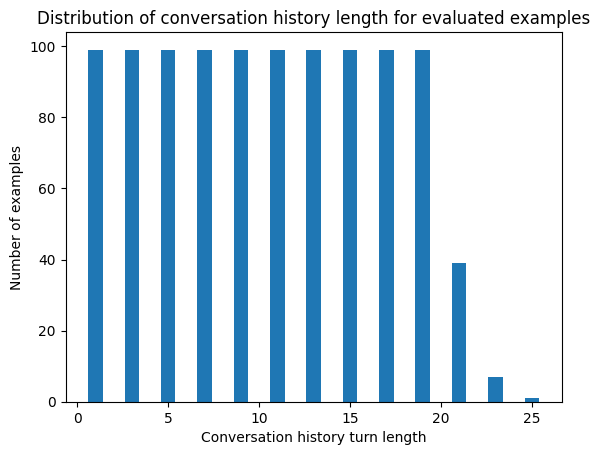

In [8]:
x = [xx[0] for xx in collection]
y = [yy[-1] for yy in collection]
plt.bar(x,y)
plt.title('Distribution of conversation history length for evaluated examples')
plt.xlabel('Conversation history turn length')
plt.ylabel('Number of examples')
plt.show()

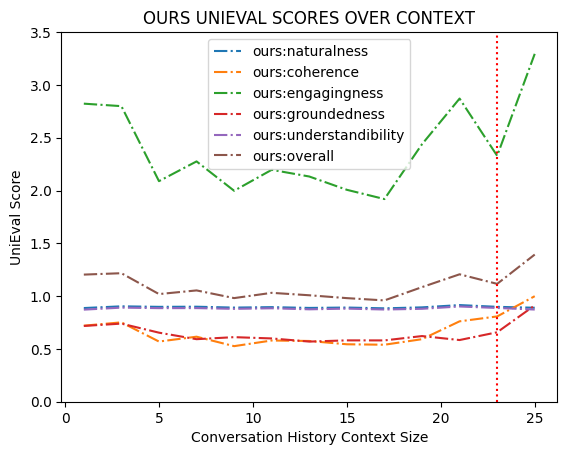

In [9]:
plt.plot([c[0] for c in collection], [c[1][0] for c in collection], '-.', label='ours:naturalness')
plt.plot([c[0] for c in collection], [c[1][1] for c in collection], '-.', label='ours:coherence')
plt.plot([c[0] for c in collection], [c[1][2] for c in collection], '-.', label='ours:engagingness')
plt.plot([c[0] for c in collection], [c[1][3] for c in collection], '-.', label='ours:groundedness')
plt.plot([c[0] for c in collection], [c[1][4] for c in collection], '-.', label='ours:understandibility')
plt.plot([c[0] for c in collection], [c[1][5] for c in collection], '-.', label='ours:overall')
plt.axvline(x=23, ls=':', color='red')
plt.title('OURS UNIEVAL SCORES OVER CONTEXT')
plt.xlabel('Conversation History Context Size')
plt.ylabel('UniEval Score')
plt.ylim(0, 3.5)
plt.legend()
plt.show()

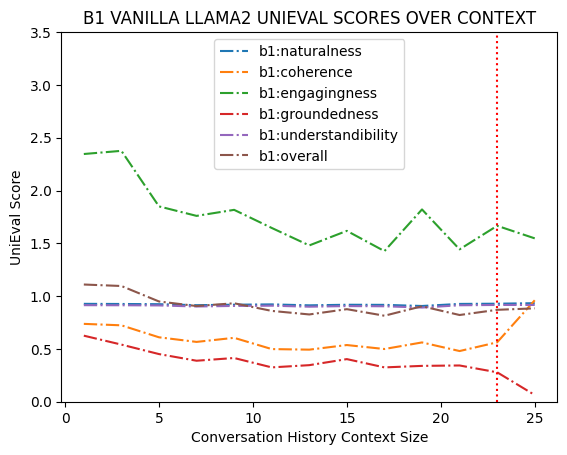

In [10]:
plt.plot([c[0] for c in collection], [c[2][0] for c in collection], '-.', label='b1:naturalness')
plt.plot([c[0] for c in collection], [c[2][1] for c in collection], '-.', label='b1:coherence')
plt.plot([c[0] for c in collection], [c[2][2] for c in collection], '-.', label='b1:engagingness')
plt.plot([c[0] for c in collection], [c[2][3] for c in collection], '-.', label='b1:groundedness')
plt.plot([c[0] for c in collection], [c[2][4] for c in collection], '-.', label='b1:understandibility')
plt.plot([c[0] for c in collection], [c[2][5] for c in collection], '-.', label='b1:overall')
plt.axvline(x=23, ls=':', color='red')
plt.title('B1 VANILLA LLAMA2 UNIEVAL SCORES OVER CONTEXT')
plt.xlabel('Conversation History Context Size')
plt.ylabel('UniEval Score')
plt.ylim(0, 3.5)
plt.legend()
plt.show()

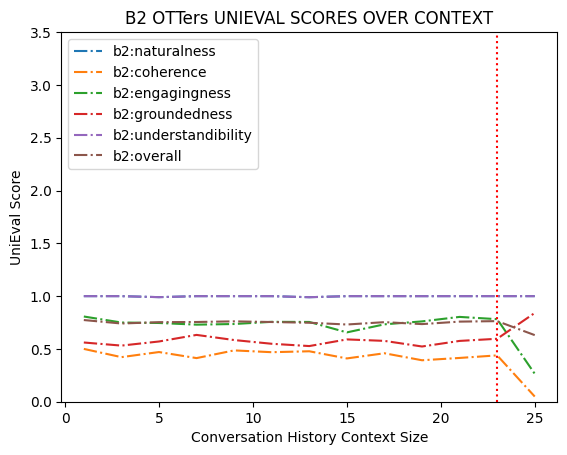

In [11]:
plt.plot([c[0] for c in collection], [c[3][0] for c in collection], '-.', label='b2:naturalness')
plt.plot([c[0] for c in collection], [c[3][1] for c in collection], '-.', label='b2:coherence')
plt.plot([c[0] for c in collection], [c[3][2] for c in collection], '-.', label='b2:engagingness')
plt.plot([c[0] for c in collection], [c[3][3] for c in collection], '-.', label='b2:groundedness')
plt.plot([c[0] for c in collection], [c[3][4] for c in collection], '-.', label='b2:understandibility')
plt.plot([c[0] for c in collection], [c[3][5] for c in collection], '-.', label='b2:overall')
plt.axvline(x=23, ls=':', color='red')
plt.title('B2 OTTers UNIEVAL SCORES OVER CONTEXT')
plt.xlabel('Conversation History Context Size')
plt.ylabel('UniEval Score')
plt.ylim(0, 3.5)
plt.legend()
plt.show()

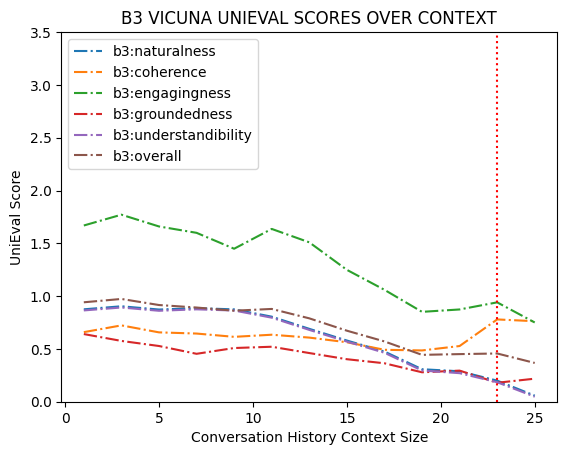

In [12]:
plt.plot([c[0] for c in collection], [c[4][0] for c in collection], '-.', label='b3:naturalness')
plt.plot([c[0] for c in collection], [c[4][1] for c in collection], '-.', label='b3:coherence')
plt.plot([c[0] for c in collection], [c[4][2] for c in collection], '-.', label='b3:engagingness')
plt.plot([c[0] for c in collection], [c[4][3] for c in collection], '-.', label='b3:groundedness')
plt.plot([c[0] for c in collection], [c[4][4] for c in collection], '-.', label='b3:understandibility')
plt.plot([c[0] for c in collection], [c[4][5] for c in collection], '-.', label='b3:overall')
plt.axvline(x=23, ls=':', color='red')
plt.title('B3 VICUNA UNIEVAL SCORES OVER CONTEXT')
plt.xlabel('Conversation History Context Size')
plt.ylabel('UniEval Score')
plt.ylim(0, 3.5)
plt.legend()
plt.show()

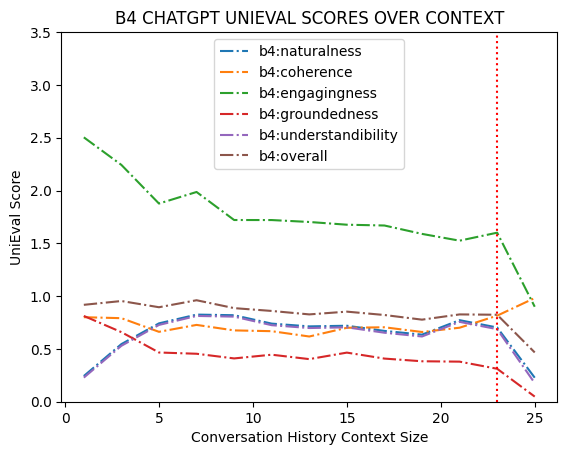

In [13]:
plt.plot([c[0] for c in collection], [c[5][0] for c in collection], '-.', label='b4:naturalness')
plt.plot([c[0] for c in collection], [c[5][1] for c in collection], '-.', label='b4:coherence')
plt.plot([c[0] for c in collection], [c[5][2] for c in collection], '-.', label='b4:engagingness')
plt.plot([c[0] for c in collection], [c[5][3] for c in collection], '-.', label='b4:groundedness')
plt.plot([c[0] for c in collection], [c[5][4] for c in collection], '-.', label='b4:understandibility')
plt.plot([c[0] for c in collection], [c[5][5] for c in collection], '-.', label='b4:overall')
plt.axvline(x=23, ls=':', color='red')
plt.title('B4 CHATGPT UNIEVAL SCORES OVER CONTEXT')
plt.xlabel('Conversation History Context Size')
plt.ylabel('UniEval Score')
plt.ylim(0, 3.5)
plt.legend()
plt.show()

## Question Asking Evaluation

In [14]:
questions_as_response_ours = []
questions_as_response_b1 = []
questions_as_response_b2 = []
questions_as_response_b3 = []
questions_as_response_b4 = []
total_instances = 0
for inst in ds:
    for i in ds[inst]:
        ours = i['ours']
        b1 = i['b1(vanilla)']
        b2 = i['b2(ott)']
        b3 = i['b3(vicuna)']
        b4 = i['b4(chatgpt)']
        total_instances += 1
        if '?' in ours['generated']:
            questions_as_response_ours.append(i)
        if '?' in b1['generated']:
            questions_as_response_b1.append(i)
        if '?' in b2['generated']:
            questions_as_response_b2.append(i)
        if '?' in b3['generated']:
            questions_as_response_b3.append(i)
        if '?' in b4['generated']:
            questions_as_response_b4.append(i)

print(f'Ours: {len(questions_as_response_ours)}/{total_instances}')
print(f'B1: {len(questions_as_response_b1)}/{total_instances}')
print(f'B2: {len(questions_as_response_b2)}/{total_instances}')
print(f'B3: {len(questions_as_response_b3)}/{total_instances}')
print(f'B4: {len(questions_as_response_b4)}/{total_instances}')


Ours: 623/1037
B1: 170/1037
B2: 1/1037
B3: 106/1037
B4: 178/1037


# Topical Chat 2

## Conversation History Length Evaluation (Topical Chat 2)

In [15]:
NUM_TURNS = 35
collection = []
for NTI in range(NUM_TURNS):
    try:
        o_sum = [0,0,0,0,0,0]
        o_sum_bleu = 0
        o_sum_rouge = [0,0,0,0]

        b1_sum = [0,0,0,0,0,0]
        b1_sum_bleu = 0
        b1_sum_rouge = [0,0,0,0]

        b2_sum = [0,0,0,0,0,0]
        b2_sum_bleu = 0
        b2_sum_rouge = [0,0,0,0]

        b3_sum = [0,0,0,0,0,0]
        b3_sum_bleu = 0
        b3_sum_rouge = [0,0,0,0]

        b4_sum = [0,0,0,0,0,0]
        b4_sum_bleu = 0
        b4_sum_rouge = [0,0,0,0]

        tot_num = 0
        for inst in ds2:
            for i in ds2[inst]:
                if i['user_in'].count('person1') + i['user_in'].count('person2') == NTI:
                    ours = i['ours']
                    b1 = i['b1(vanilla)']
                    b2 = i['b2(ott)']
                    b3 = i['b3(vicuna)']
                    b4 = i['b4(chatgpt)']
                    #print(ours['unieval'])
                    o_sum = [sum(x) for x in zip(o_sum, ours['unieval'][0].values())]
                    o_sum_bleu += ours['bleu']
                    o_sum_rouge = [sum(x) for x in zip(o_sum_rouge, ours['rouge'].values())]

                    b1_sum = [sum(x) for x in zip(b1_sum, b1['unieval'][0].values())]
                    b1_sum_bleu += b1['bleu']

                    b2_sum = [sum(x) for x in zip(b2_sum, b2['unieval'][0].values())]
                    b2_sum_bleu += b2['bleu']

                    b3_sum = [sum(x) for x in zip(b3_sum, b3['unieval'][0].values())]
                    b3_sum_bleu += b3['bleu']

                    b4_sum = [sum(x) for x in zip(b4_sum, b4['unieval'][0].values())]
                    b4_sum_bleu += b4['bleu']

                    tot_num += 1

        # print scores when they are all together
        print('naturalness, coherence, engagingness, groundedness, understandibility, overall')
        print('ours: ', [o/tot_num for o in o_sum])
        print('ours bleu: ', o_sum_bleu/tot_num)
        print('ours rouge: ', [o/tot_num for o in o_sum_rouge])
        print()
        print('b1: ', [b/tot_num for b in b1_sum])
        print('b1 bleu: ', b1_sum_bleu/tot_num)
        print('b1 rouge: ', [o/tot_num for o in b1_sum_rouge])
        print()
        print('b2: ', [b/tot_num for b in b2_sum])
        print('b2 bleu: ', b2_sum_bleu/tot_num)
        print('b2 rouge: ', [o/tot_num for o in b2_sum_rouge])
        print()
        print('b3: ', [b/tot_num for b in b3_sum])
        print('b3 bleu: ', b3_sum_bleu/tot_num)
        print('b3 rouge: ', [o/tot_num for o in b3_sum_rouge])
        print()
        print('b4: ', [b/tot_num for b in b4_sum])
        print('b4 bleu: ', b4_sum_bleu/tot_num)
        print('b4 rouge: ', [o/tot_num for o in b4_sum_rouge])
        print()
        print(tot_num)
        collection.append([NTI, [o/tot_num for o in o_sum], [b/tot_num for b in b1_sum], [b/tot_num for b in b2_sum], [b/tot_num for b in b3_sum], [b/tot_num for b in b4_sum], tot_num])
    except:
        continue

naturalness, coherence, engagingness, groundedness, understandibility, overall
naturalness, coherence, engagingness, groundedness, understandibility, overall
ours:  [0.8995912003012582, 0.6687315621222204, 2.7570798430398114, 0.6990648396723333, 0.8835444476496801, 1.1816023785570602]
ours bleu:  0.0698483796119355
ours rouge:  [0.1759236756532459, 0.022984859407448956, 0.1450753375328345, 0.1450753375328345]

b1:  [0.9344792085700523, 0.7293636176021554, 2.435216780208861, 0.6426544003451093, 0.9217400595201963, 1.1326908132492746]
b1 bleu:  0.11918805148210893
b1 rouge:  [0.0, 0.0, 0.0, 0.0]

b2:  [0.9996871341074547, 0.6741512178216061, 0.936194868109575, 0.5066641278552155, 0.9996417927010149, 0.8232678281189733]
b2 bleu:  0.22460925217031233
b2 rouge:  [0.0, 0.0, 0.0, 0.0]

b3:  [0.8230234276102104, 0.6794650634610269, 1.6423286660852823, 0.6276197702021259, 0.8112622063107301, 0.9167398267338752]
b3 bleu:  0.19797784114880682
b3 rouge:  [0.0, 0.0, 0.0, 0.0]

b4:  [0.2347853846291

In [16]:
print('naturalness, coherence, engagingness, groundedness, understandibility, overall')
for c in collection:
    print(c)

naturalness, coherence, engagingness, groundedness, understandibility, overall
[1, [0.8995912003012582, 0.6687315621222204, 2.7570798430398114, 0.6990648396723333, 0.8835444476496801, 1.1816023785570602], [0.9344792085700523, 0.7293636176021554, 2.435216780208861, 0.6426544003451093, 0.9217400595201963, 1.1326908132492746], [0.9996871341074547, 0.6741512178216061, 0.936194868109575, 0.5066641278552155, 0.9996417927010149, 0.8232678281189733], [0.8230234276102104, 0.6794650634610269, 1.6423286660852823, 0.6276197702021259, 0.8112622063107301, 0.9167398267338752], [0.23478538462919932, 0.7995470573874537, 2.3820131424938054, 0.7935779013535673, 0.218860382855713, 0.8857567737439477], 164]
[3, [0.902166326117209, 0.6549573336322152, 2.65298454678205, 0.7376720312826406, 0.8889703600088642, 1.1673501195645954], [0.9268711217662647, 0.6741645666259755, 2.3698920237658085, 0.5677777373199684, 0.9139508776860831, 1.0905312654328199], [0.9997277806808584, 0.46766086110400895, 0.776032434080086

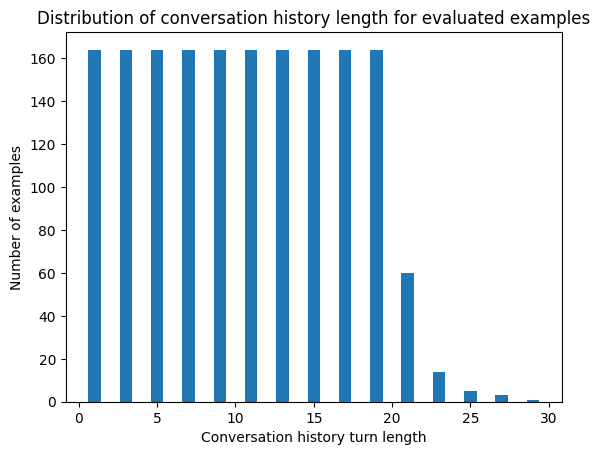

In [17]:
x = [xx[0] for xx in collection]
y = [yy[-1] for yy in collection]
plt.bar(x,y)
plt.title('Distribution of conversation history length for evaluated examples')
plt.xlabel('Conversation history turn length')
plt.ylabel('Number of examples')
plt.show()

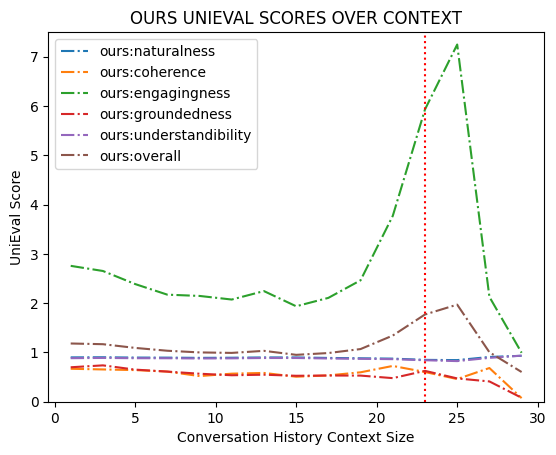

In [18]:
plt.plot([c[0] for c in collection], [c[1][0] for c in collection], '-.', label='ours:naturalness')
plt.plot([c[0] for c in collection], [c[1][1] for c in collection], '-.', label='ours:coherence')
plt.plot([c[0] for c in collection], [c[1][2] for c in collection], '-.', label='ours:engagingness')
plt.plot([c[0] for c in collection], [c[1][3] for c in collection], '-.', label='ours:groundedness')
plt.plot([c[0] for c in collection], [c[1][4] for c in collection], '-.', label='ours:understandibility')
plt.plot([c[0] for c in collection], [c[1][5] for c in collection], '-.', label='ours:overall')
plt.axvline(x=23, ls=':', color='red')
plt.title('OURS UNIEVAL SCORES OVER CONTEXT')
plt.xlabel('Conversation History Context Size')
plt.ylabel('UniEval Score')
plt.ylim(0, 7.5)
plt.legend()
plt.show()

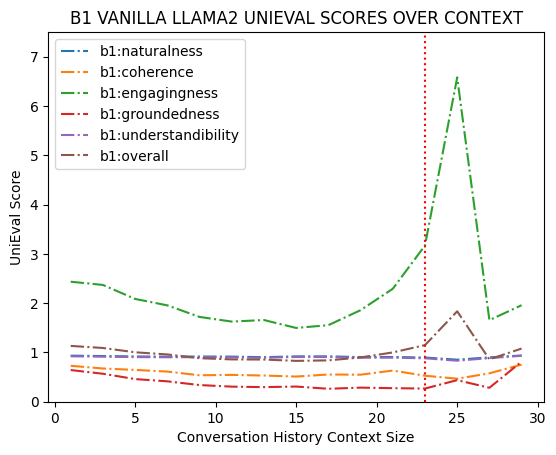

In [19]:
plt.plot([c[0] for c in collection], [c[2][0] for c in collection], '-.', label='b1:naturalness')
plt.plot([c[0] for c in collection], [c[2][1] for c in collection], '-.', label='b1:coherence')
plt.plot([c[0] for c in collection], [c[2][2] for c in collection], '-.', label='b1:engagingness')
plt.plot([c[0] for c in collection], [c[2][3] for c in collection], '-.', label='b1:groundedness')
plt.plot([c[0] for c in collection], [c[2][4] for c in collection], '-.', label='b1:understandibility')
plt.plot([c[0] for c in collection], [c[2][5] for c in collection], '-.', label='b1:overall')
plt.axvline(x=23, ls=':', color='red')
plt.title('B1 VANILLA LLAMA2 UNIEVAL SCORES OVER CONTEXT')
plt.xlabel('Conversation History Context Size')
plt.ylabel('UniEval Score')
plt.ylim(0, 7.5)
plt.legend()
plt.show()

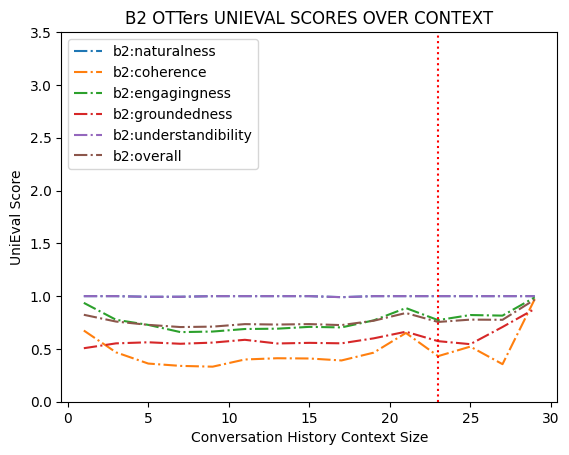

In [20]:
plt.plot([c[0] for c in collection], [c[3][0] for c in collection], '-.', label='b2:naturalness')
plt.plot([c[0] for c in collection], [c[3][1] for c in collection], '-.', label='b2:coherence')
plt.plot([c[0] for c in collection], [c[3][2] for c in collection], '-.', label='b2:engagingness')
plt.plot([c[0] for c in collection], [c[3][3] for c in collection], '-.', label='b2:groundedness')
plt.plot([c[0] for c in collection], [c[3][4] for c in collection], '-.', label='b2:understandibility')
plt.plot([c[0] for c in collection], [c[3][5] for c in collection], '-.', label='b2:overall')
plt.axvline(x=23, ls=':', color='red')
plt.title('B2 OTTers UNIEVAL SCORES OVER CONTEXT')
plt.xlabel('Conversation History Context Size')
plt.ylabel('UniEval Score')
plt.ylim(0, 3.5)
plt.legend()
plt.show()

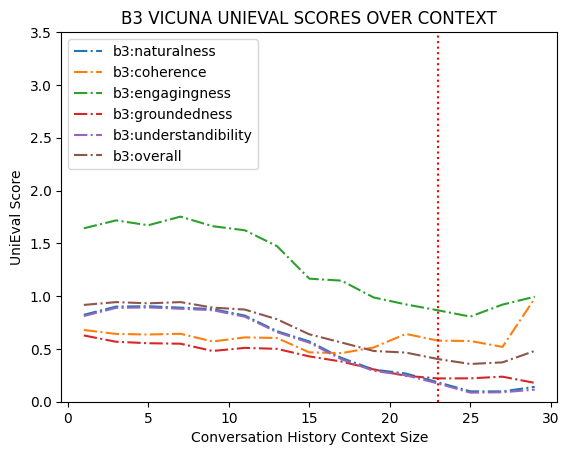

In [21]:
plt.plot([c[0] for c in collection], [c[4][0] for c in collection], '-.', label='b3:naturalness')
plt.plot([c[0] for c in collection], [c[4][1] for c in collection], '-.', label='b3:coherence')
plt.plot([c[0] for c in collection], [c[4][2] for c in collection], '-.', label='b3:engagingness')
plt.plot([c[0] for c in collection], [c[4][3] for c in collection], '-.', label='b3:groundedness')
plt.plot([c[0] for c in collection], [c[4][4] for c in collection], '-.', label='b3:understandibility')
plt.plot([c[0] for c in collection], [c[4][5] for c in collection], '-.', label='b3:overall')
plt.axvline(x=23, ls=':', color='red')
plt.title('B3 VICUNA UNIEVAL SCORES OVER CONTEXT')
plt.xlabel('Conversation History Context Size')
plt.ylabel('UniEval Score')
plt.ylim(0, 3.5)
plt.legend()
plt.show()

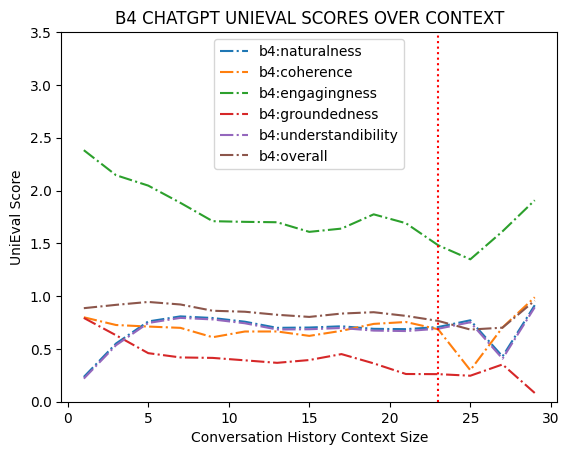

In [22]:
plt.plot([c[0] for c in collection], [c[5][0] for c in collection], '-.', label='b4:naturalness')
plt.plot([c[0] for c in collection], [c[5][1] for c in collection], '-.', label='b4:coherence')
plt.plot([c[0] for c in collection], [c[5][2] for c in collection], '-.', label='b4:engagingness')
plt.plot([c[0] for c in collection], [c[5][3] for c in collection], '-.', label='b4:groundedness')
plt.plot([c[0] for c in collection], [c[5][4] for c in collection], '-.', label='b4:understandibility')
plt.plot([c[0] for c in collection], [c[5][5] for c in collection], '-.', label='b4:overall')
plt.axvline(x=23, ls=':', color='red')
plt.title('B4 CHATGPT UNIEVAL SCORES OVER CONTEXT')
plt.xlabel('Conversation History Context Size')
plt.ylabel('UniEval Score')
plt.ylim(0, 3.5)
plt.legend()
plt.show()

## Question Asking Evaluation

In [23]:
questions_as_response_ours = []
questions_as_response_b1 = []
questions_as_response_b2 = []
questions_as_response_b3 = []
questions_as_response_b4 = []
total_instances = 0
for inst in ds2:
    for i in ds2[inst]:
        ours = i['ours']
        b1 = i['b1(vanilla)']
        b2 = i['b2(ott)']
        b3 = i['b3(vicuna)']
        b4 = i['b4(chatgpt)']
        total_instances += 1
        if '?' in ours['generated']:
            questions_as_response_ours.append(i)
        if '?' in b1['generated']:
            questions_as_response_b1.append(i)
        if '?' in b2['generated']:
            questions_as_response_b2.append(i)
        if '?' in b3['generated']:
            questions_as_response_b3.append(i)
        if '?' in b4['generated']:
            questions_as_response_b4.append(i)

print(f'Ours: {len(questions_as_response_ours)}/{total_instances}')
print(f'B1: {len(questions_as_response_b1)}/{total_instances}')
print(f'B2: {len(questions_as_response_b2)}/{total_instances}')
print(f'B3: {len(questions_as_response_b3)}/{total_instances}')
print(f'B4: {len(questions_as_response_b4)}/{total_instances}')


Ours: 1060/1723
B1: 323/1723
B2: 1/1723
B3: 202/1723
B4: 294/1723


# TIAGE

## CHLE (TIAGE)

In [24]:
NUM_TURNS = 35
collection = []
for NTI in range(NUM_TURNS):
    try:
        o_sum = [0,0,0,0,0,0]
        o_sum_bleu = 0
        o_sum_rouge = [0,0,0,0]

        b1_sum = [0,0,0,0,0,0]
        b1_sum_bleu = 0
        b1_sum_rouge = [0,0,0,0]

        b2_sum = [0,0,0,0,0,0]
        b2_sum_bleu = 0
        b2_sum_rouge = [0,0,0,0]

        b3_sum = [0,0,0,0,0,0]
        b3_sum_bleu = 0
        b3_sum_rouge = [0,0,0,0]

        b4_sum = [0,0,0,0,0,0]
        b4_sum_bleu = 0
        b4_sum_rouge = [0,0,0,0]

        tot_num = 0
        for inst in ds_tiage:
            for i in ds_tiage[inst]:
                if i['user_in'].count('person1') + i['user_in'].count('person2') == NTI:
                    ours = i['ours']
                    b1 = i['b1(vanilla)']
                    b2 = i['b2(ott)']
                    b3 = i['b3(vicuna)']
                    b4 = i['b4(chatgpt)']
                    #print(ours['unieval'])
                    o_sum = [sum(x) for x in zip(o_sum, ours['unieval'][0].values())]
                    o_sum_bleu += ours['bleu']
                    o_sum_rouge = [sum(x) for x in zip(o_sum_rouge, ours['rouge'].values())]

                    b1_sum = [sum(x) for x in zip(b1_sum, b1['unieval'][0].values())]
                    b1_sum_bleu += b1['bleu']

                    b2_sum = [sum(x) for x in zip(b2_sum, b2['unieval'][0].values())]
                    b2_sum_bleu += b2['bleu']

                    b3_sum = [sum(x) for x in zip(b3_sum, b3['unieval'][0].values())]
                    b3_sum_bleu += b3['bleu']

                    b4_sum = [sum(x) for x in zip(b4_sum, b4['unieval'][0].values())]
                    b4_sum_bleu += b4['bleu']

                    tot_num += 1

        # print scores when they are all together
        print('naturalness, coherence, engagingness, groundedness, understandibility, overall')
        print('ours: ', [o/tot_num for o in o_sum])
        print('ours bleu: ', o_sum_bleu/tot_num)
        print('ours rouge: ', [o/tot_num for o in o_sum_rouge])
        print()
        print('b1: ', [b/tot_num for b in b1_sum])
        print('b1 bleu: ', b1_sum_bleu/tot_num)
        print('b1 rouge: ', [o/tot_num for o in b1_sum_rouge])
        print()
        print('b2: ', [b/tot_num for b in b2_sum])
        print('b2 bleu: ', b2_sum_bleu/tot_num)
        print('b2 rouge: ', [o/tot_num for o in b2_sum_rouge])
        print()
        print('b3: ', [b/tot_num for b in b3_sum])
        print('b3 bleu: ', b3_sum_bleu/tot_num)
        print('b3 rouge: ', [o/tot_num for o in b3_sum_rouge])
        print()
        print('b4: ', [b/tot_num for b in b4_sum])
        print('b4 bleu: ', b4_sum_bleu/tot_num)
        print('b4 rouge: ', [o/tot_num for o in b4_sum_rouge])
        print()
        print(tot_num)
        collection.append([NTI, [o/tot_num for o in o_sum], [b/tot_num for b in b1_sum], [b/tot_num for b in b2_sum], [b/tot_num for b in b3_sum], [b/tot_num for b in b4_sum], tot_num])
    except:
        continue

naturalness, coherence, engagingness, groundedness, understandibility, overall
naturalness, coherence, engagingness, groundedness, understandibility, overall
ours:  [0.9053474204783059, 0.6858558600108217, 2.389760609283201, 0.6488534714362646, 0.8940149010559514, 1.1047664524529086]
ours bleu:  0.026364399847851175
ours rouge:  [0.1347152732144219, 0.008075925216528982, 0.12407333411957357, 0.12407333411957357]

b1:  [0.9338104670917607, 0.7127499164554726, 2.684866758797202, 0.5806387010104862, 0.921880266744409, 1.1667892220198663]
b1 bleu:  0.09696286449234223
b1 rouge:  [0.0, 0.0, 0.0, 0.0]

b2:  [0.9996583453635168, 0.3927573459103188, 0.6879686617517833, 0.5635222469405077, 0.9996017782841362, 0.7287016756500525]
b2 bleu:  0.18082010924426914
b2 rouge:  [0.0, 0.0, 0.0, 0.0]

b3:  [0.903667989034257, 0.7564214267604985, 1.6145965660019574, 0.638639584034422, 0.889375178542812, 0.9605401488747894]
b3 bleu:  0.2306637894933396
b3 rouge:  [0.0, 0.0, 0.0, 0.0]

b4:  [0.24866427270291

In [25]:
print('naturalness, coherence, engagingness, groundedness, understandibility, overall')
for c in collection:
    print(c)

naturalness, coherence, engagingness, groundedness, understandibility, overall
[1, [0.9053474204783059, 0.6858558600108217, 2.389760609283201, 0.6488534714362646, 0.8940149010559514, 1.1047664524529086], [0.9338104670917607, 0.7127499164554726, 2.684866758797202, 0.5806387010104862, 0.921880266744409, 1.1667892220198663], [0.9996583453635168, 0.3927573459103188, 0.6879686617517833, 0.5635222469405077, 0.9996017782841362, 0.7287016756500525], [0.903667989034257, 0.7564214267604985, 1.6145965660019574, 0.638639584034422, 0.889375178542812, 0.9605401488747894], [0.2486642727029147, 0.7576902728663596, 2.771644269783875, 0.7678999075980596, 0.21782769768298374, 0.9527452841268388], 99]
[3, [0.9022484094761899, 0.585010305010406, 2.4024742309884455, 0.8771251344981447, 0.8889065819716526, 1.1311529323889684], [0.9202772013809457, 0.5495415847174558, 2.187286124992833, 0.765416822902964, 0.9066220054219993, 1.0658287478832396], [0.999721838541912, 0.49705244643859364, 0.7594248277048651, 0.5

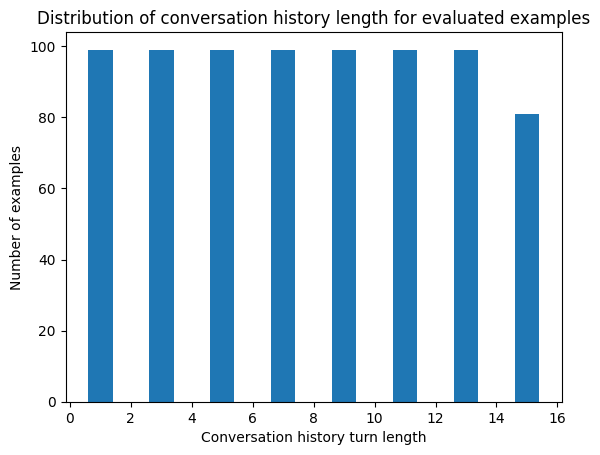

In [26]:
x = [xx[0] for xx in collection]
y = [yy[-1] for yy in collection]
plt.bar(x,y)
plt.title('Distribution of conversation history length for evaluated examples')
plt.xlabel('Conversation history turn length')
plt.ylabel('Number of examples')
plt.show()

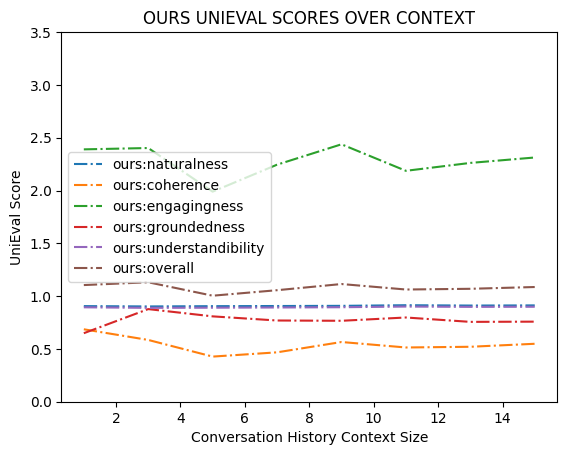

In [27]:
plt.plot([c[0] for c in collection], [c[1][0] for c in collection], '-.', label='ours:naturalness')
plt.plot([c[0] for c in collection], [c[1][1] for c in collection], '-.', label='ours:coherence')
plt.plot([c[0] for c in collection], [c[1][2] for c in collection], '-.', label='ours:engagingness')
plt.plot([c[0] for c in collection], [c[1][3] for c in collection], '-.', label='ours:groundedness')
plt.plot([c[0] for c in collection], [c[1][4] for c in collection], '-.', label='ours:understandibility')
plt.plot([c[0] for c in collection], [c[1][5] for c in collection], '-.', label='ours:overall')
plt.title('OURS UNIEVAL SCORES OVER CONTEXT')
plt.xlabel('Conversation History Context Size')
plt.ylabel('UniEval Score')
plt.ylim(0, 3.5)
plt.legend()
plt.show()

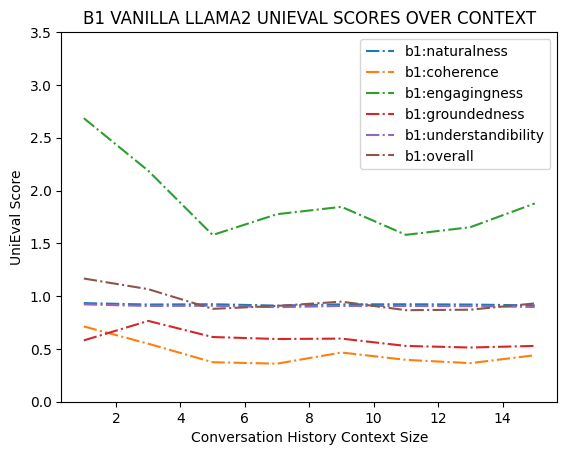

In [28]:
plt.plot([c[0] for c in collection], [c[2][0] for c in collection], '-.', label='b1:naturalness')
plt.plot([c[0] for c in collection], [c[2][1] for c in collection], '-.', label='b1:coherence')
plt.plot([c[0] for c in collection], [c[2][2] for c in collection], '-.', label='b1:engagingness')
plt.plot([c[0] for c in collection], [c[2][3] for c in collection], '-.', label='b1:groundedness')
plt.plot([c[0] for c in collection], [c[2][4] for c in collection], '-.', label='b1:understandibility')
plt.plot([c[0] for c in collection], [c[2][5] for c in collection], '-.', label='b1:overall')
plt.title('B1 VANILLA LLAMA2 UNIEVAL SCORES OVER CONTEXT')
plt.xlabel('Conversation History Context Size')
plt.ylabel('UniEval Score')
plt.ylim(0, 3.5)
plt.legend()
plt.show()

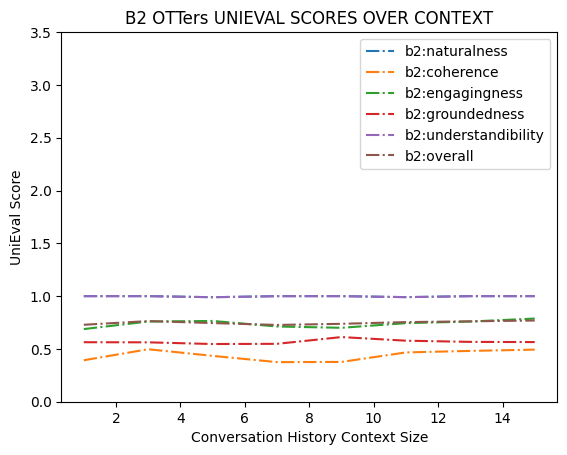

In [29]:
plt.plot([c[0] for c in collection], [c[3][0] for c in collection], '-.', label='b2:naturalness')
plt.plot([c[0] for c in collection], [c[3][1] for c in collection], '-.', label='b2:coherence')
plt.plot([c[0] for c in collection], [c[3][2] for c in collection], '-.', label='b2:engagingness')
plt.plot([c[0] for c in collection], [c[3][3] for c in collection], '-.', label='b2:groundedness')
plt.plot([c[0] for c in collection], [c[3][4] for c in collection], '-.', label='b2:understandibility')
plt.plot([c[0] for c in collection], [c[3][5] for c in collection], '-.', label='b2:overall')
plt.title('B2 OTTers UNIEVAL SCORES OVER CONTEXT')
plt.xlabel('Conversation History Context Size')
plt.ylabel('UniEval Score')
plt.ylim(0, 3.5)
plt.legend()
plt.show()

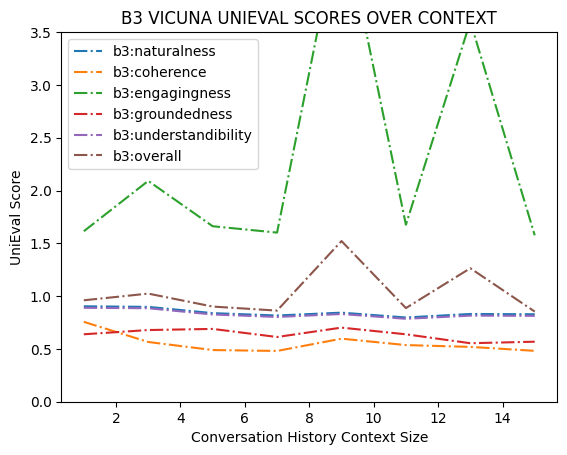

In [30]:
plt.plot([c[0] for c in collection], [c[4][0] for c in collection], '-.', label='b3:naturalness')
plt.plot([c[0] for c in collection], [c[4][1] for c in collection], '-.', label='b3:coherence')
plt.plot([c[0] for c in collection], [c[4][2] for c in collection], '-.', label='b3:engagingness')
plt.plot([c[0] for c in collection], [c[4][3] for c in collection], '-.', label='b3:groundedness')
plt.plot([c[0] for c in collection], [c[4][4] for c in collection], '-.', label='b3:understandibility')
plt.plot([c[0] for c in collection], [c[4][5] for c in collection], '-.', label='b3:overall')
plt.title('B3 VICUNA UNIEVAL SCORES OVER CONTEXT')
plt.xlabel('Conversation History Context Size')
plt.ylabel('UniEval Score')
plt.ylim(0, 3.5)
plt.legend()
plt.show()

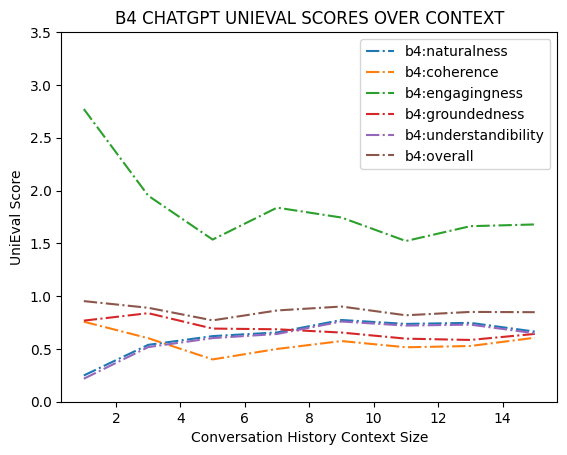

In [31]:
plt.plot([c[0] for c in collection], [c[5][0] for c in collection], '-.', label='b4:naturalness')
plt.plot([c[0] for c in collection], [c[5][1] for c in collection], '-.', label='b4:coherence')
plt.plot([c[0] for c in collection], [c[5][2] for c in collection], '-.', label='b4:engagingness')
plt.plot([c[0] for c in collection], [c[5][3] for c in collection], '-.', label='b4:groundedness')
plt.plot([c[0] for c in collection], [c[5][4] for c in collection], '-.', label='b4:understandibility')
plt.plot([c[0] for c in collection], [c[5][5] for c in collection], '-.', label='b4:overall')
plt.title('B4 CHATGPT UNIEVAL SCORES OVER CONTEXT')
plt.xlabel('Conversation History Context Size')
plt.ylabel('UniEval Score')
plt.ylim(0, 3.5)
plt.legend()
plt.show()

## QAE (TIAGE)

In [32]:
questions_as_response_ours = []
questions_as_response_b1 = []
questions_as_response_b2 = []
questions_as_response_b3 = []
questions_as_response_b4 = []
total_instances = 0
for inst in ds_tiage:
    for i in ds_tiage[inst]:
        ours = i['ours']
        b1 = i['b1(vanilla)']
        b2 = i['b2(ott)']
        b3 = i['b3(vicuna)']
        b4 = i['b4(chatgpt)']
        total_instances += 1
        if '?' in ours['generated']:
            questions_as_response_ours.append(i)
        if '?' in b1['generated']:
            questions_as_response_b1.append(i)
        if '?' in b2['generated']:
            questions_as_response_b2.append(i)
        if '?' in b3['generated']:
            questions_as_response_b3.append(i)
        if '?' in b4['generated']:
            questions_as_response_b4.append(i)

print(f'Ours: {len(questions_as_response_ours)}/{total_instances}')
print(f'B1: {len(questions_as_response_b1)}/{total_instances}')
print(f'B2: {len(questions_as_response_b2)}/{total_instances}')
print(f'B3: {len(questions_as_response_b3)}/{total_instances}')
print(f'B4: {len(questions_as_response_b4)}/{total_instances}')

Ours: 599/774
B1: 297/774
B2: 1/774
B3: 119/774
B4: 365/774


# MULTIWOZ

## CHLE (MULTIWOZ)

In [33]:
NUM_TURNS = 35
collection = []
for NTI in range(NUM_TURNS):
    try:
        o_sum = [0,0,0,0,0,0]
        o_sum_bleu = 0
        o_sum_rouge = [0,0,0,0]

        b1_sum = [0,0,0,0,0,0]
        b1_sum_bleu = 0
        b1_sum_rouge = [0,0,0,0]

        b2_sum = [0,0,0,0,0,0]
        b2_sum_bleu = 0
        b2_sum_rouge = [0,0,0,0]

        b3_sum = [0,0,0,0,0,0]
        b3_sum_bleu = 0
        b3_sum_rouge = [0,0,0,0]

        b4_sum = [0,0,0,0,0,0]
        b4_sum_bleu = 0
        b4_sum_rouge = [0,0,0,0]

        tot_num = 0
        for inst in ds_multiwoz:
            for i in ds_multiwoz[inst]:
                if i['user_in'].count('person1') + i['user_in'].count('person2') == NTI:
                    ours = i['ours']
                    b1 = i['b1(vanilla)']
                    b2 = i['b2(ott)']
                    b3 = i['b3(vicuna)']
                    b4 = i['b4(chatgpt)']
                    #print(ours['unieval'])
                    o_sum = [sum(x) for x in zip(o_sum, ours['unieval'][0].values())]
                    o_sum_bleu += ours['bleu']
                    o_sum_rouge = [sum(x) for x in zip(o_sum_rouge, ours['rouge'].values())]

                    b1_sum = [sum(x) for x in zip(b1_sum, b1['unieval'][0].values())]
                    b1_sum_bleu += b1['bleu']

                    b2_sum = [sum(x) for x in zip(b2_sum, b2['unieval'][0].values())]
                    b2_sum_bleu += b2['bleu']

                    b3_sum = [sum(x) for x in zip(b3_sum, b3['unieval'][0].values())]
                    b3_sum_bleu += b3['bleu']

                    b4_sum = [sum(x) for x in zip(b4_sum, b4['unieval'][0].values())]
                    b4_sum_bleu += b4['bleu']

                    tot_num += 1

        # print scores when they are all together
        print('naturalness, coherence, engagingness, groundedness, understandibility, overall')
        print('ours: ', [o/tot_num for o in o_sum])
        print('ours bleu: ', o_sum_bleu/tot_num)
        print('ours rouge: ', [o/tot_num for o in o_sum_rouge])
        print()
        print('b1: ', [b/tot_num for b in b1_sum])
        print('b1 bleu: ', b1_sum_bleu/tot_num)
        print('b1 rouge: ', [o/tot_num for o in b1_sum_rouge])
        print()
        print('b2: ', [b/tot_num for b in b2_sum])
        print('b2 bleu: ', b2_sum_bleu/tot_num)
        print('b2 rouge: ', [o/tot_num for o in b2_sum_rouge])
        print()
        print('b3: ', [b/tot_num for b in b3_sum])
        print('b3 bleu: ', b3_sum_bleu/tot_num)
        print('b3 rouge: ', [o/tot_num for o in b3_sum_rouge])
        print()
        print('b4: ', [b/tot_num for b in b4_sum])
        print('b4 bleu: ', b4_sum_bleu/tot_num)
        print('b4 rouge: ', [o/tot_num for o in b4_sum_rouge])
        print()
        print(tot_num)
        collection.append([NTI, [o/tot_num for o in o_sum], [b/tot_num for b in b1_sum], [b/tot_num for b in b2_sum], [b/tot_num for b in b3_sum], [b/tot_num for b in b4_sum], tot_num])
    except:
        continue

naturalness, coherence, engagingness, groundedness, understandibility, overall
naturalness, coherence, engagingness, groundedness, understandibility, overall
ours:  [0.9123694827081255, 0.8386183094409879, 3.553439759427868, 0.7145987594457963, 0.9016676738095327, 1.384138796966462]
ours bleu:  0.09100790234681384
ours rouge:  [0.18989697391210195, 0.022904394321153747, 0.14817615846182983, 0.14817615846182983]

b1:  [0.9267220645906937, 0.9009566520793201, 3.125787372746434, 0.7243982546698443, 0.9172547335724123, 1.31902381553174]
b1 bleu:  0.14343753988409486
b1 rouge:  [0.0, 0.0, 0.0, 0.0]

b2:  [0.9996786403448681, 0.37681107141067816, 0.7059188755219792, 0.5907861875628532, 0.9996264161500806, 0.734564238198092]
b2 bleu:  0.17012628749085276
b2 rouge:  [0.0, 0.0, 0.0, 0.0]

b3:  [0.8777082391164878, 0.863853462565116, 3.291759516383563, 0.6696885643403959, 0.8705058032590874, 1.3147031171329302]
b3 bleu:  0.1670829845754972
b3 rouge:  [0.0, 0.0, 0.0, 0.0]

b4:  [0.255846072488811

In [34]:
print('naturalness, coherence, engagingness, groundedness, understandibility, overall')
for c in collection:
    print(c)

naturalness, coherence, engagingness, groundedness, understandibility, overall
[1, [0.9123694827081255, 0.8386183094409879, 3.553439759427868, 0.7145987594457963, 0.9016676738095327, 1.384138796966462], [0.9267220645906937, 0.9009566520793201, 3.125787372746434, 0.7243982546698443, 0.9172547335724123, 1.31902381553174], [0.9996786403448681, 0.37681107141067816, 0.7059188755219792, 0.5907861875628532, 0.9996264161500806, 0.734564238198092], [0.8777082391164878, 0.863853462565116, 3.291759516383563, 0.6696885643403959, 0.8705058032590874, 1.3147031171329302], [0.2558460724888118, 0.9368987471817357, 2.5362672455757576, 0.6575496850745064, 0.2279629481024196, 0.9229049396846463], 234]
[3, [0.904238106078097, 0.8393611347733402, 3.5124930211906222, 0.7584631744657226, 0.8962964930938169, 1.3821703859203198], [0.9170267535534518, 0.9463070011107354, 3.0202199541543466, 0.6794082334693975, 0.9087498795052849, 1.2943423643586418], [0.9997168911454076, 0.44619505043346896, 0.7561281240073597, 

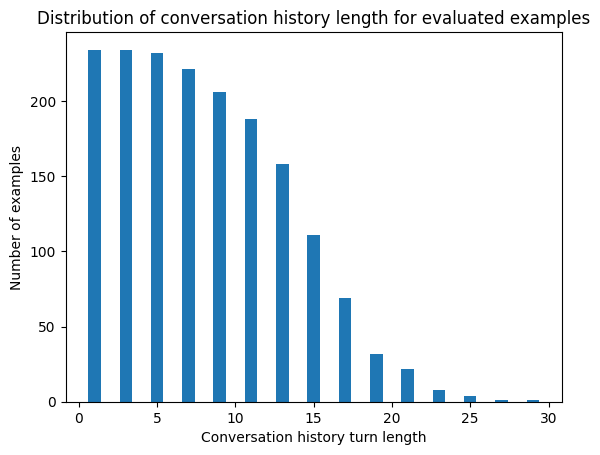

In [35]:
x = [xx[0] for xx in collection]
y = [yy[-1] for yy in collection]
plt.bar(x,y)
plt.title('Distribution of conversation history length for evaluated examples')
plt.xlabel('Conversation history turn length')
plt.ylabel('Number of examples')
plt.show()

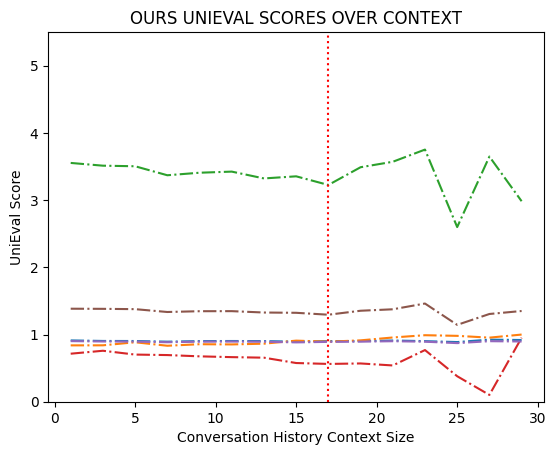

In [36]:
plt.plot([c[0] for c in collection], [c[1][0] for c in collection], '-.', label='ours:naturalness')
plt.plot([c[0] for c in collection], [c[1][1] for c in collection], '-.', label='ours:coherence')
plt.plot([c[0] for c in collection], [c[1][2] for c in collection], '-.', label='ours:engagingness')
plt.plot([c[0] for c in collection], [c[1][3] for c in collection], '-.', label='ours:groundedness')
plt.plot([c[0] for c in collection], [c[1][4] for c in collection], '-.', label='ours:understandibility')
plt.plot([c[0] for c in collection], [c[1][5] for c in collection], '-.', label='ours:overall')
plt.axvline(x=17, ls=':', color='red')
plt.title('OURS UNIEVAL SCORES OVER CONTEXT')
plt.xlabel('Conversation History Context Size')
plt.ylabel('UniEval Score')
plt.ylim(0, 5.5)
# plt.legend()
plt.show()

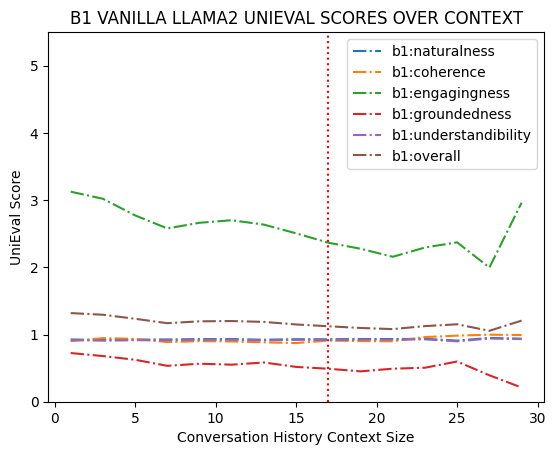

In [37]:
plt.plot([c[0] for c in collection], [c[2][0] for c in collection], '-.', label='b1:naturalness')
plt.plot([c[0] for c in collection], [c[2][1] for c in collection], '-.', label='b1:coherence')
plt.plot([c[0] for c in collection], [c[2][2] for c in collection], '-.', label='b1:engagingness')
plt.plot([c[0] for c in collection], [c[2][3] for c in collection], '-.', label='b1:groundedness')
plt.plot([c[0] for c in collection], [c[2][4] for c in collection], '-.', label='b1:understandibility')
plt.plot([c[0] for c in collection], [c[2][5] for c in collection], '-.', label='b1:overall')
plt.axvline(x=17, ls=':', color='red')
plt.title('B1 VANILLA LLAMA2 UNIEVAL SCORES OVER CONTEXT')
plt.xlabel('Conversation History Context Size')
plt.ylabel('UniEval Score')
plt.ylim(0, 5.5)
plt.legend()
plt.show()

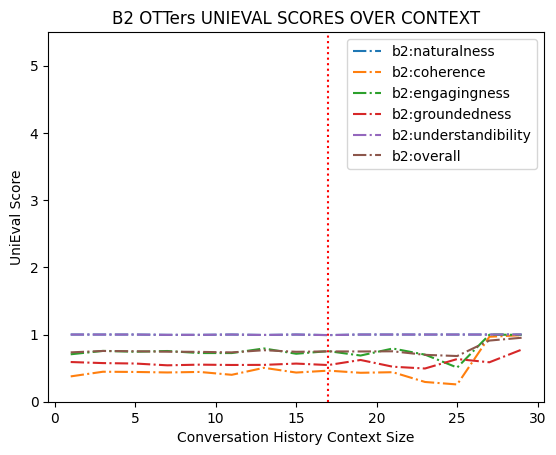

In [38]:
plt.plot([c[0] for c in collection], [c[3][0] for c in collection], '-.', label='b2:naturalness')
plt.plot([c[0] for c in collection], [c[3][1] for c in collection], '-.', label='b2:coherence')
plt.plot([c[0] for c in collection], [c[3][2] for c in collection], '-.', label='b2:engagingness')
plt.plot([c[0] for c in collection], [c[3][3] for c in collection], '-.', label='b2:groundedness')
plt.plot([c[0] for c in collection], [c[3][4] for c in collection], '-.', label='b2:understandibility')
plt.plot([c[0] for c in collection], [c[3][5] for c in collection], '-.', label='b2:overall')
plt.axvline(x=17, ls=':', color='red')
plt.title('B2 OTTers UNIEVAL SCORES OVER CONTEXT')
plt.xlabel('Conversation History Context Size')
plt.ylabel('UniEval Score')
plt.ylim(0, 5.5)
plt.legend()
plt.show()

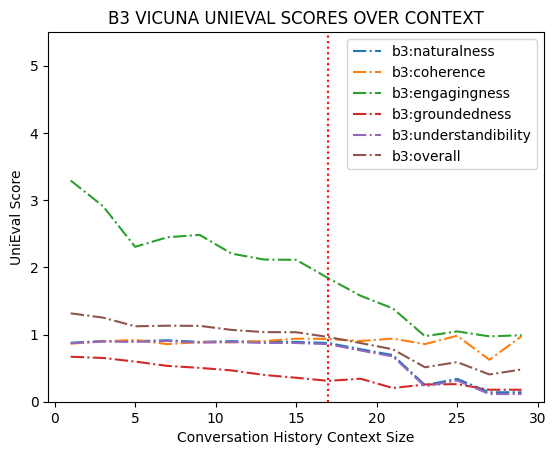

In [39]:
plt.plot([c[0] for c in collection], [c[4][0] for c in collection], '-.', label='b3:naturalness')
plt.plot([c[0] for c in collection], [c[4][1] for c in collection], '-.', label='b3:coherence')
plt.plot([c[0] for c in collection], [c[4][2] for c in collection], '-.', label='b3:engagingness')
plt.plot([c[0] for c in collection], [c[4][3] for c in collection], '-.', label='b3:groundedness')
plt.plot([c[0] for c in collection], [c[4][4] for c in collection], '-.', label='b3:understandibility')
plt.plot([c[0] for c in collection], [c[4][5] for c in collection], '-.', label='b3:overall')
plt.axvline(x=17, ls=':', color='red')
plt.title('B3 VICUNA UNIEVAL SCORES OVER CONTEXT')
plt.xlabel('Conversation History Context Size')
plt.ylabel('UniEval Score')
plt.ylim(0, 5.5)
plt.legend()
plt.show()

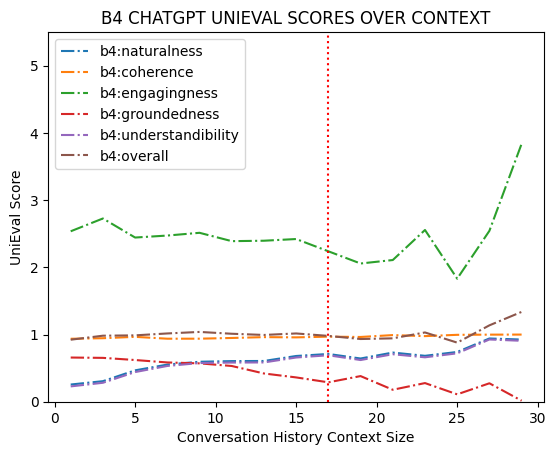

In [40]:
plt.plot([c[0] for c in collection], [c[5][0] for c in collection], '-.', label='b4:naturalness')
plt.plot([c[0] for c in collection], [c[5][1] for c in collection], '-.', label='b4:coherence')
plt.plot([c[0] for c in collection], [c[5][2] for c in collection], '-.', label='b4:engagingness')
plt.plot([c[0] for c in collection], [c[5][3] for c in collection], '-.', label='b4:groundedness')
plt.plot([c[0] for c in collection], [c[5][4] for c in collection], '-.', label='b4:understandibility')
plt.plot([c[0] for c in collection], [c[5][5] for c in collection], '-.', label='b4:overall')
plt.axvline(x=17, ls=':', color='red')
plt.title('B4 CHATGPT UNIEVAL SCORES OVER CONTEXT')
plt.xlabel('Conversation History Context Size')
plt.ylabel('UniEval Score')
plt.ylim(0, 5.5)
plt.legend()
plt.show()

## QAE (MULTIWOZ)

In [41]:
questions_as_response_ours = []
questions_as_response_b1 = []
questions_as_response_b2 = []
questions_as_response_b3 = []
questions_as_response_b4 = []
total_instances = 0
for inst in ds_multiwoz:
    for i in ds_multiwoz[inst]:
        ours = i['ours']
        b1 = i['b1(vanilla)']
        b2 = i['b2(ott)']
        b3 = i['b3(vicuna)']
        b4 = i['b4(chatgpt)']
        total_instances += 1
        if '?' in ours['generated']:
            questions_as_response_ours.append(i)
        if '?' in b1['generated']:
            questions_as_response_b1.append(i)
        if '?' in b2['generated']:
            questions_as_response_b2.append(i)
        if '?' in b3['generated']:
            questions_as_response_b3.append(i)
        if '?' in b4['generated']:
            questions_as_response_b4.append(i)

print(f'Ours: {len(questions_as_response_ours)}/{total_instances}')
print(f'B1: {len(questions_as_response_b1)}/{total_instances}')
print(f'B2: {len(questions_as_response_b2)}/{total_instances}')
print(f'B3: {len(questions_as_response_b3)}/{total_instances}')
print(f'B4: {len(questions_as_response_b4)}/{total_instances}')

Ours: 1110/1721
B1: 669/1721
B2: 1/1721
B3: 656/1721
B4: 715/1721


# Breaking UniEval

In [42]:
from UniEval.UniEval.utils import convert_to_json
from UniEval.UniEval.metric.evaluator import get_evaluator

/home/trevor/TR/topic-responder-venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [43]:
uni_evaluator = get_evaluator('dialogue')

In [44]:
response = 'Lorem Ipsum'
target = 'person2:I think I did hear something about that.  I imagine it is an attempt to psych the other team out.'
conv_history = [f'{target}\n']

In [45]:
data = convert_to_json(output_list=[response], 
                       src_list=conv_history, context_list=[''])
uval = uni_evaluator.evaluate(data, print_result=False)

Evaluating naturalness of 1 samples !!!


100%|██████████| 1/1 [00:00<00:00,  6.63it/s]


Evaluating coherence of 1 samples !!!


100%|██████████| 1/1 [00:00<00:00, 18.47it/s]


Evaluating engagingness of 1 samples !!!


100%|██████████| 1/1 [00:00<00:00, 19.97it/s]


Evaluating groundedness of 1 samples !!!


100%|██████████| 1/1 [00:00<00:00, 20.88it/s]


Evaluating understandability of 1 samples !!!


100%|██████████| 1/1 [00:00<00:00, 20.43it/s]


In [46]:
print(uval)

[{'naturalness': 0.3084946630053238, 'coherence': 0.0036367660108235843, 'engagingness': 0.017020242055354805, 'groundedness': 0.024328954479118994, 'understandability': 0.31118877325796324, 'overall': 0.13293387976171686}]


In [47]:
ours = [2,1,3,2,3,2,2,1,1,3]
vanilla = [3,2,4,3,2,1,4,2,3,1]
vicuna = [1,4,2,1,4,4,3,4,4,4]
gpt = [4,3,1,4,1,3,1,3,2,2]

print('ours: ', sum(ours)/len(ours))
print('vanilla: ', sum(vanilla)/len(vanilla))
print('vicuna: ', sum(vicuna)/len(vicuna))
print('gpt: ', sum(gpt)/len(gpt))

# fix 9
# fix 10

ours:  2.0
vanilla:  2.5
vicuna:  3.1
gpt:  2.4


In [51]:
# from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, AutoModelForCausalLM

# b3_tokenizer = AutoTokenizer.from_pretrained("lmsys/vicuna-7b-v1.5")
# b3_model = AutoModelForCausalLM.from_pretrained("lmsys/vicuna-7b-v1.5")

Loading checkpoint shards: 100%|██████████| 2/2 [00:08<00:00,  4.46s/it]


In [55]:
# user_in = "person1:Hi. I didn't know that benjarvus green-ellis never had a fumble.  Impressive! person2:I know, right? I thought it was weird how the cheerleaders arent allowed to eat in the same restaurants as the nfl players. person1:yeah, that is bizarre.  Iowa's visiting locker room is pink.  Strange person2:I wonder if that was meant to try to demoralize the players person1:Seems like it would work lol.   person2:I was shocked that the highest score in a football game was 222... THATS CRAZY! person1:No doubt.  And the other team was shut out!  Also, bowlers used to make more than football players.  That's changed! person2:Yea it has... could you imagine if bowlers were paid more than nfl players now? They would make average 6-12 million a year for bowling lol person1:That'd be nuts!  An NFL game only has 11 minutes of gameplay...I never would have guessed that person2:I already knew that, which is why I get so frustrated with how long a game takes :( person1:Yeah, I can imagine that would be frustrating.  I usually only watch the super bowl and that game takes forever! person2:I thought it was pretty cool that the cat in the opening scene of the Godfather, was just a stray. Chances are that was an unplanned scene. person1:I'd bet that, too.  So, in asia you can pay to play with cats...now that's weird! person2:I think its a waste of money lol just get a cat person1:no doubt, cats are everywhere!  person2:Everywhere including Alaska... where they are made mayors. Now thats weird lol person1:They also co-author physics papers! person2:Im not sure the actual purpose of either, but they are both pretty strange! person1:Yeah, I don't get it either lol.  Apparently cats just sleep for two-thirds of their lives anyway person2:yea, Im 35 right now... I couldn't imagine sleeping 12 years of that. No wonder cats are considered lazy lol person1:That's basically sleeping 16 hours a day...I cannot imagine that person2:I will say that I was pleased to see that at least an engineer has higher wages than an nfl or mlb player. I faithfully believe that sport players are WAY overpaid. person1:Considering how unimportant their jobs are, I agree.  Unfortunately they generate a ton of revenue sense people pay so much for tickets and merch.  Its all a waste IMO"
# inputs = b3_tokenizer(user_in + 'person2:', return_tensors="pt")

# generate_ids = b3_model.generate(inputs.input_ids, max_length=1000)
# b3_out = b3_tokenizer.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

# b3_out = b3_out.split("person2:")[-1]
# print(b3_out)

I agree, it's a shame that the people who actually contribute to society, like doctors and engineers, aren't paid as much as these athletes.
